# Basics of Machine Learning `part 2`

In [83]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Table of Contents
<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Performance metrics in classification](#perf_metrics)
- [Model selection]
- [Regression tasks](#toyexample)

# Libraries and dataset

In [84]:
import random
import numpy as np
from basics.utils import reduce_dataset

We consider here a more complex dataset, stemming from "real-world" data

In [85]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [86]:
from sklearn import datasets
dataset = datasets.fetch_covtype()

In [87]:
print(dataset.data.shape)

(581012, 54)


In [88]:
print(np.unique(dataset.target))

[1 2 3 4 5 6 7]


In [89]:
features = dataset.data
labels = dataset.target

In [90]:
[features, labels] = reduce_dataset(features, labels, num_obs=1660)

In [91]:
print(features.shape)
print(labels.shape)

(11620, 54)
(11620,)


<a name="perf_metrics"></a>
# Performance metrics in classification

## Accuracy

We have already mentioned that accuracy is a widely metrics to assess the performance of a model. It counts the number of good predictions among all the predictions

Let us inspect accuracy on the dataset considered. We first split the dataset into a training set and a testing set.

**Good practice**: shuffle the dataset 

In [92]:
import random

In [93]:
indexes = np.arange(len(features.data))
print(indexes)

[    0     1     2 ... 11617 11618 11619]


In [94]:
random.shuffle(indexes)
print(indexes)

[ 9437    41 10107 ...  7383  8535  2799]


Shuffled dataset:

In [95]:
X = features[indexes]
Y = labels[indexes]

Now we can split between **training set** and **testing set**

In [96]:
train_X = X[:int(0.8 * len(X))]
train_Y = Y[:int(0.8 * len(Y))]

In [97]:
test_X = X[int(0.8 * len(X)):]
test_Y = Y[int(0.8 * len(Y)):]

Inspect total sizes:

In [98]:
print(train_X.shape)
print(test_X.shape)

(9296, 54)
(2324, 54)


Let's get a classifier of our choice (e.g. SVM)

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
clf = KNeighborsClassifier()

In [101]:
clf.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
accuracy = clf.score(test_X, test_Y)
print('accuracy =', accuracy)

accuracy = 0.7870051635111877


**QUESTION: what does it mean?**

## Confusion matrix

It's good to have a statistics on the number of good answers our classifier is able to predict, but if we want to understand its behaviour we need more information. 

A very common metric is to inspect the confusion the classifier is making between classes, it's what we called confusion matrix: it is counting the number of times an instance from class `i` has been predicted as class `j` where `j` can be `i` or another one. 

<img src='./assets/confusion_matrix.png' style="width:20%"></img>

In [103]:
pred_Y = clf.predict(test_X)

In [105]:
print(pred_Y)

[3 7 6 ... 5 5 2]


In [106]:
classes = np.unique(test_Y)
num_classes = len(classes)
print(num_classes, classes)

7 [1 2 3 4 5 6 7]


In [116]:
confmat = np.zeros((num_classes, num_classes))
for obs_i in range(len(test_X)):
    pred_Y_i = clf.predict([test_X[obs_i]])
    confmat[test_Y[obs_i] - 1, pred_Y_i - 1] += 1

In [117]:
confmat

array([[198.,  68.,   1.,   0.,  22.,   0.,  43.],
       [ 81., 154.,  17.,   0.,  61.,   7.,   6.],
       [  0.,   3., 270.,  24.,   2.,  60.,   0.],
       [  0.,   0.,   5., 282.,   0.,   5.,   0.],
       [  1.,   8.,   9.,   0., 321.,   5.,   0.],
       [  0.,   0.,  25.,  15.,   9., 261.,   0.],
       [ 17.,   1.,   0.,   0.,   0.,   0., 343.]])

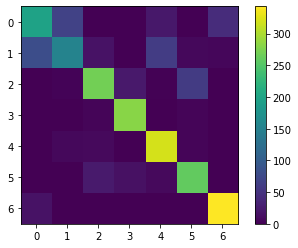

In [118]:
plt.imshow(confmat)
plt.colorbar()

### Using sklearn

Sklearn provides a method for computing confusion matrices, see dedicated page: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
pred_Y = clf.predict(test_X)

In [119]:
confmat = confusion_matrix(test_Y, pred_Y)

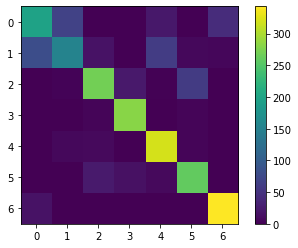

In [120]:
plt.imshow(confmat)
plt.colorbar()

## Limitation of accuracy: adding other metrics

So far we made a strong constraint on our datasets : **each class has the same number of observations!**. This is not realistic in real world cases. 

Let's inspect what happens in case of datasets with unbalanced classes. We take the original data, this time we reduce the whole dataset by keeping a certain percentage of the observations per class, and not a fixed number of them. 

In [121]:
features = dataset.data
labels = dataset.target
[features, labels] = reduce_dataset(features, labels, reduce_by=98)

In [122]:
print(features.shape)

(11617, 54)


As before, we shuffle and build the training and testing sets:

In [123]:
indexes = np.arange(len(features.data))
random.shuffle(indexes)

In [124]:
X = features[indexes]
Y = labels[indexes]

In [125]:
train_X = X[:int(0.8 * len(X))]
train_Y = Y[:int(0.8 * len(Y))]

In [126]:
test_X = X[int(0.8 * len(X)):]
test_Y = Y[int(0.8 * len(Y)):]

Inspect number of instances per class:

In [127]:
for c in np.unique(labels):
    idx_train = np.where(train_Y == c)[0]
    idx_test = np.where(test_Y == c)[0]
    print('class', c, '\t num. training obs', len(idx_train), ' | num. testing obs', len(idx_test))

class 1 	 num. training obs 3339  | num. testing obs 897
class 2 	 num. training obs 4572  | num. testing obs 1094
class 3 	 num. training obs 584  | num. testing obs 131
class 4 	 num. training obs 47  | num. testing obs 7
class 5 	 num. training obs 151  | num. testing obs 38
class 6 	 num. training obs 266  | num. testing obs 81
class 7 	 num. training obs 334  | num. testing obs 76


In [128]:
clf = KNeighborsClassifier()

In [129]:
clf.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
accuracy = clf.score(test_X, test_Y)
print('accuracy =', accuracy)

accuracy = 0.8666092943201377


**QUESTIONS:** 
- Do we have a better classifier than before? 
- What does this score mean?

Exercice: plot the confusion matrix and comment

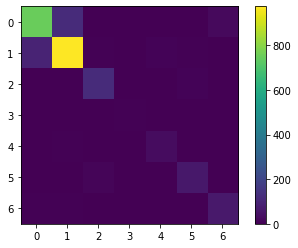

In [156]:
pred_Y = clf.predict(test_X)
confmat = confusion_matrix(test_Y, pred_Y)
plt.imshow(confmat)
plt.colorbar()

Let try to inspect relatively

In [157]:
confmat = np.float32(confmat)

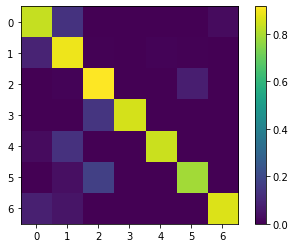

In [158]:
for i in range(len(confmat)):
    confmat[i,:] = confmat[i,:] / np.sum(confmat[i,:])
plt.imshow(confmat)
plt.colorbar()

Accuracy is limited because it does not give insights on performance. 

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@lri.fr))
___